In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1st Part


1. Find the Moving Avg for all close, open, high, low

In [2]:
train = pd.read_excel('new_data.xlsx')
print(train)

                     Date    Open    High     Low   Close    Volume
0     2015-01-04 16:00:00   40.60   40.76   40.31   40.72  36865322
1     2015-02-04 16:00:00   40.66   40.74   40.12   40.29  37487476
2     2015-06-04 16:00:00   40.34   41.78   40.18   41.55  39223692
3     2015-07-04 16:00:00   41.61   41.91   41.31   41.53  28809375
4     2015-08-04 16:00:00   41.48   41.69   41.04   41.42  24753438
...                   ...     ...     ...     ...     ...       ...
1506   3/25/2021 16:00:00  235.30  236.94  231.57  232.34  34061853
1507   3/26/2021 16:00:00  231.55  236.71  231.55  236.48  25479853
1508   3/29/2021 16:00:00  236.59  236.80  231.88  235.24  25227455
1509   3/30/2021 16:00:00  233.53  233.85  231.10  231.85  24792012
1510   3/31/2021 16:00:00  232.91  239.10  232.39  235.77  43623471

[1511 rows x 6 columns]


In [3]:
train['SMA_3'] = train['Close'].rolling(window=3).mean()
print(train['SMA_3'].tail(10))

1501    235.156667
1502    232.703333
1503    232.353333
1504    234.640000
1505    236.343333
1506    235.126667
1507    234.760000
1508    234.686667
1509    234.523333
1510    234.286667
Name: SMA_3, dtype: float64


In [4]:
train['SMA_5'] = train['Close'].rolling(window=5).mean()
print(train['SMA_5'].tail(10))

1501    235.206
1502    234.126
1503    234.362
1504    234.336
1505    234.020
1506    234.344
1507    235.570
1508    235.420
1509    234.274
1510    234.336
Name: SMA_5, dtype: float64


In [5]:
train['SMA_7'] = train['Close'].rolling(window=7).mean()
print(train['SMA_7'].tail(10))

1501    235.082857
1502    234.787143
1503    234.624286
1504    234.885714
1505    234.978571
1506    234.211429
1507    234.131429
1508    234.777143
1509    234.991429
1510    234.960000
Name: SMA_7, dtype: float64


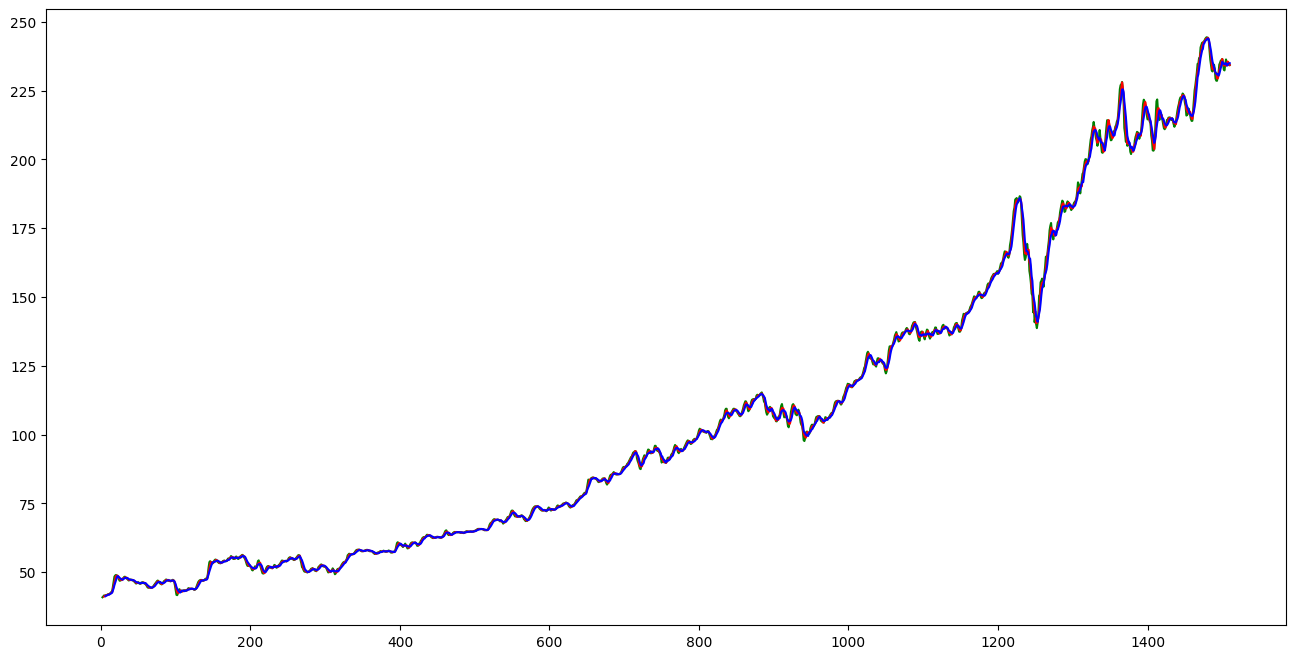

In [10]:
#figure(figsize=16,8)
train['SMA_3'].plot(color='green',figsize=(16,8))
train['SMA_5'].plot(color='red', figsize=(16,8))
train['SMA_7'].plot(color='blue',figsize=(16,8))
plt.show()

# 2nd Part

In [11]:
#Augmented Dickey - Fuller statistic to check stationarity
#Null Hypothesis: The time series data is non-stationary
#Alternative Hypothesis: The time series data is stationary
train=train.dropna()
t = train["Close"].values
result = adfuller(t)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#If the p-value is less than or equal to 0.05, you reject H0 and conclude that the time series is stationary.
#If the p-value is greater than 0.05 , you fail to reject H0 and conclude that the time series is not stationary.

ADF Statistic: 1.766284
p-value: 0.998280


<Axes: >

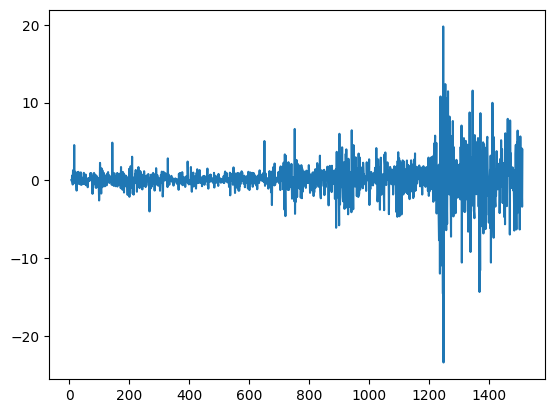

In [12]:

train['Close_diff']= train['Close']-train['Close'].shift(1)
train['Close_diff'].plot()

In [13]:
result = adfuller(train['Close_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.027340
p-value: 0.000000


In [17]:
Auto_corr = acf(train['Close_diff'].dropna())
Auto_corr

array([ 1.00000000e+00, -2.74430143e-01,  7.68859507e-02,  2.24754337e-02,
       -3.09746927e-02, -4.37194015e-04, -1.19232582e-01,  1.43166769e-01,
       -1.34792085e-01,  1.58890013e-01, -1.01382983e-01,  1.52333343e-02,
        1.73166639e-02, -1.02814403e-01,  5.90082272e-02, -1.12519676e-01,
        1.15937859e-01, -6.38937162e-02,  7.53842868e-02, -2.55439933e-02,
       -4.59628104e-02,  6.90497802e-02, -1.03655647e-01,  2.61750874e-02,
       -8.23249381e-02,  6.49892171e-03, -8.16356979e-02,  5.50724966e-02,
       -7.35202310e-03, -5.52074460e-03,  5.72791190e-02, -3.74454940e-02])

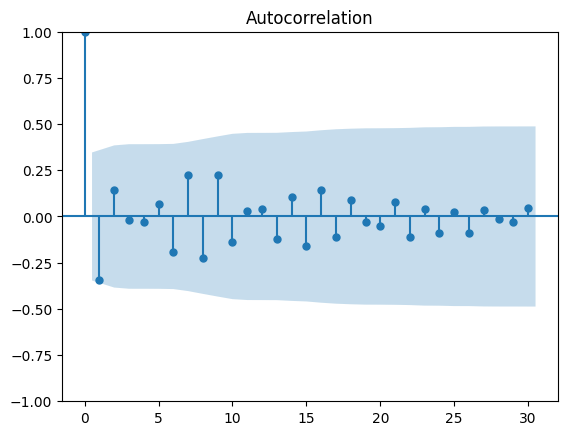

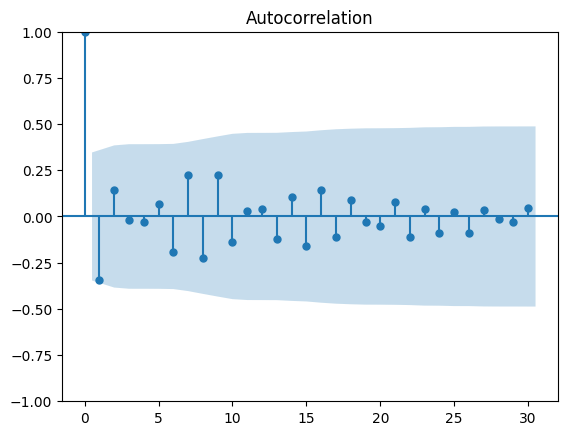

In [22]:
plot_acf(Auto_corr,lags=30)

In [23]:
partial_acf= pacf(train['Close_diff'].dropna())
partial_acf

array([ 1.        , -0.27461273,  0.00170473,  0.04769104, -0.0140088 ,
       -0.01788461, -0.13426176,  0.08841115, -0.06898806,  0.11802171,
       -0.04787827, -0.02540245, -0.00406944, -0.07558508, -0.0089553 ,
       -0.06564163,  0.04113566,  0.00382959,  0.04305728, -0.01170012,
       -0.04752452,  0.01788663, -0.03362397, -0.04784741, -0.06079457,
       -0.07016573, -0.09863313,  0.02065642, -0.0150325 ,  0.02491908,
        0.01445876,  0.01368733])

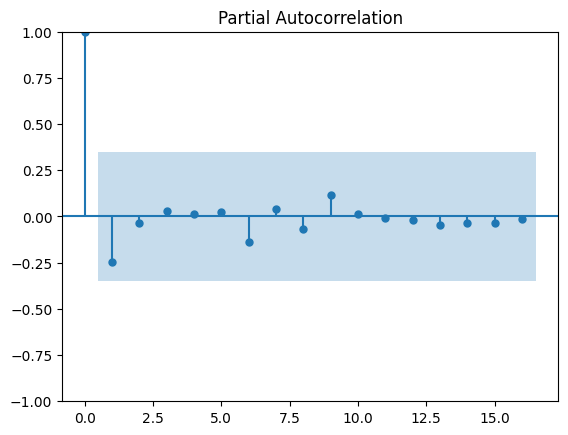

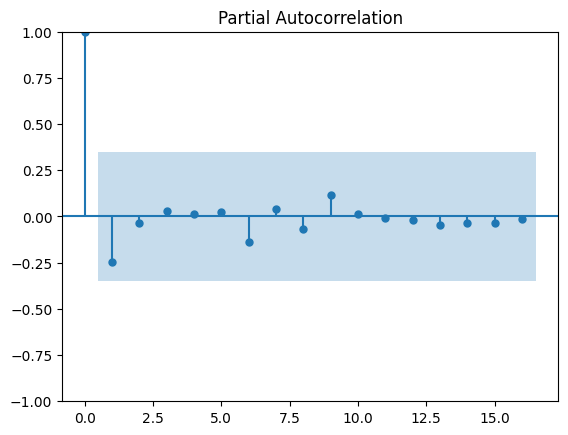

In [27]:
plot_pacf(partial_acf)

1. Check for stationarity before applying ACF
2. Choose the model accordingly